In [1]:
import pandas as pd
import sys
sys.path.append('../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [2]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [3]:
conn=db.get_conn()
data_original=pd.read_sql(sql="select * from _201904 where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)=2019 and MONTH(publish_date)=4", con=conn)
conn.close()

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [5]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [6]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print("2019年4月{0}招收{1}{2}人。2019年4月{0}{1}平均工资{3:.0f}元，工资中位数{4:.0f}元，其中95%的人的工资介于{5:.0f}元到{6:.0f}元。\r\n".format("全国",career, head_count, salary_average, q[1], q[0], q[2]))
    
get_summary(data, '程序员')

2019年4月全国招收程序员302303人。2019年4月全国程序员平均工资12807元，工资中位数11500元，其中95%的人的工资介于3750元到32500元。



In [7]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [40]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,20255,4898,19500,45000,9979,3.30%
1,算法工程师,19231,4500,17500,45000,24177,8.00%
3,爬虫工程师,14362,3750,12500,35000,489,0.16%
0,一般程序员,11947,3750,11500,29166,267586,88.52%
4,生物信息工程师,9410,4500,8000,16500,72,0.02%


# 程序员工资

In [41]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17539,3750,15000,45000,23618,7.81%
上海,16009,5250,14583,35000,45725,15.13%
广东,14143,4000,12500,35000,75793,25.07%
浙江,13383,3750,12500,30000,19115,6.32%
四川,11633,3500,11000,26966,12048,3.99%
江苏,11555,3750,10500,27500,33463,11.07%
湖北,11113,3750,10000,26000,16023,5.30%
陕西,10612,3750,10000,22500,7848,2.60%
湖南,10526,3750,10000,22500,6677,2.21%
天津,10251,4500,9000,22500,2256,0.75%


In [9]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print("2019年4月{0}招收{1}{2}人。2019年4月{0}{1}平均工资{3:.0f}元，工资中位数{4:.0f}元，其中95%的人的工资介于{5:.0f}元到{6:.0f}元。\r\n".format(row[0], career, row[5], row[1], row[3], row[2], row[4]))


In [10]:
describe(data_city,'程序员')

2019年4月北京招收程序员23618人。2019年4月北京程序员平均工资17539元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年4月上海招收程序员45725人。2019年4月上海程序员平均工资16009元，工资中位数14583元，其中95%的人的工资介于5250元到35000元。

2019年4月广东招收程序员75793人。2019年4月广东程序员平均工资14143元，工资中位数12500元，其中95%的人的工资介于4000元到35000元。

2019年4月浙江招收程序员19115人。2019年4月浙江程序员平均工资13383元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年4月四川招收程序员12048人。2019年4月四川程序员平均工资11633元，工资中位数11000元，其中95%的人的工资介于3500元到26966元。

2019年4月江苏招收程序员33463人。2019年4月江苏程序员平均工资11555元，工资中位数10500元，其中95%的人的工资介于3750元到27500元。

2019年4月湖北招收程序员16023人。2019年4月湖北程序员平均工资11113元，工资中位数10000元，其中95%的人的工资介于3750元到26000元。

2019年4月陕西招收程序员7848人。2019年4月陕西程序员平均工资10612元，工资中位数10000元，其中95%的人的工资介于3750元到22500元。

2019年4月湖南招收程序员6677人。2019年4月湖南程序员平均工资10526元，工资中位数10000元，其中95%的人的工资介于3750元到22500元。

2019年4月天津招收程序员2256人。2019年4月天津程序员平均工资10251元，工资中位数9000元，其中95%的人的工资介于4500元到22500元。

2019年4月重庆招收程序员4211人。2019年4月重庆程序员平均工资9818元，工资中位数9000元，其中95%的人的工资介于3750元到20000元。

2019年4月福建招收程序员6097人。2019年4月福建程序员平均工资9779元，工资中位数9000元，其中95%的人的工资介于3250元到20000元。

2019年4月海南招收程序员

In [11]:
data_location = pd.read_csv('../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [12]:
data_location.head()

,capital,longitude,latitude
province,,,
辽宁,沈阳市,123.429092,41.796768
吉林,长春市,125.324501,43.886841
黑龙江,哈尔滨市,126.642464,45.756966
北京,北京市,116.405289,39.904987
天津,天津市,117.190186,39.125595


In [13]:
from mpl_toolkits.basemap import Basemap

In [14]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


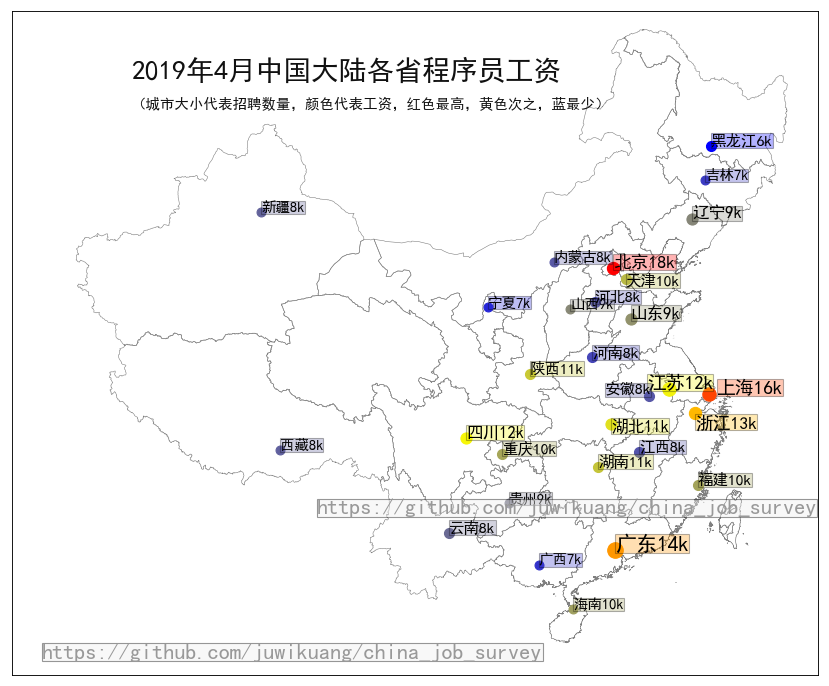

In [15]:
draw_map(data_city,2000,'2019年4月中国大陆各省程序员工资')

# 算法工程师

In [16]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年4月全国招收算法工程师24177人。2019年4月全国算法工程师平均工资19231元，工资中位数17500元，其中95%的人的工资介于4500元到45000元。



In [42]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,26933,5588,22500,65000,3167,13.10%
上海,22465,6388,22500,45000,4154,17.18%
海南,20583,12500,15000,35000,30,0.12%
广东,20493,6000,18000,45000,5718,23.65%
浙江,18222,3750,17500,45000,1885,7.80%
江苏,17086,4319,15000,37500,2963,12.26%
四川,16277,5250,15000,31250,1036,4.29%
湖北,15728,5045,15000,35000,1165,4.82%
内蒙古,15000,15000,15000,15000,1,0.00%
江西,14430,6584,11900,37500,67,0.28%


In [18]:
describe(data_city_algorithm,'算法工程师')

2019年4月北京招收算法工程师3167人。2019年4月北京算法工程师平均工资26933元，工资中位数22500元，其中95%的人的工资介于5588元到65000元。

2019年4月上海招收算法工程师4154人。2019年4月上海算法工程师平均工资22465元，工资中位数22500元，其中95%的人的工资介于6388元到45000元。

2019年4月海南招收算法工程师30人。2019年4月海南算法工程师平均工资20583元，工资中位数15000元，其中95%的人的工资介于12500元到35000元。

2019年4月广东招收算法工程师5718人。2019年4月广东算法工程师平均工资20493元，工资中位数18000元，其中95%的人的工资介于6000元到45000元。

2019年4月浙江招收算法工程师1885人。2019年4月浙江算法工程师平均工资18222元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2019年4月江苏招收算法工程师2963人。2019年4月江苏算法工程师平均工资17086元，工资中位数15000元，其中95%的人的工资介于4319元到37500元。

2019年4月四川招收算法工程师1036人。2019年4月四川算法工程师平均工资16277元，工资中位数15000元，其中95%的人的工资介于5250元到31250元。

2019年4月湖北招收算法工程师1165人。2019年4月湖北算法工程师平均工资15728元，工资中位数15000元，其中95%的人的工资介于5045元到35000元。

2019年4月内蒙古招收算法工程师1人。2019年4月内蒙古算法工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2019年4月江西招收算法工程师67人。2019年4月江西算法工程师平均工资14430元，工资中位数11900元，其中95%的人的工资介于6584元到37500元。

2019年4月陕西招收算法工程师720人。2019年4月陕西算法工程师平均工资14374元，工资中位数12916元，其中95%的人的工资介于5000元到27500元。

2019年4月湖南招收算法工程师475人。2019年4月湖南算法工程师平均工资13558元，工资中位数12500元，

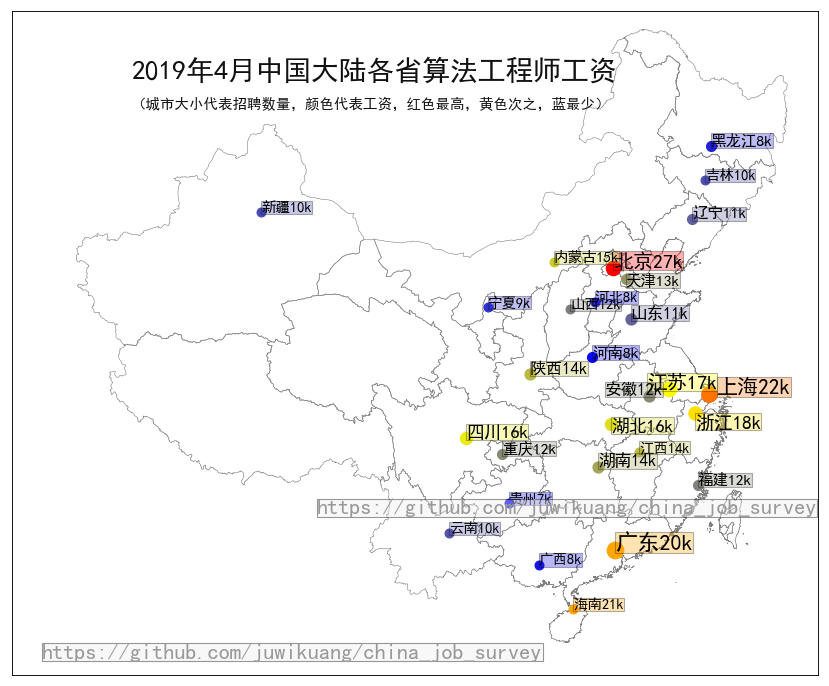

In [19]:
draw_map(data_city_algorithm,100,'2019年4月中国大陆各省算法工程师工资')

# 系统架构师

In [20]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年4月全国招收系统架构师9979人。2019年4月全国系统架构师平均工资20255元，工资中位数19500元，其中95%的人的工资介于4898元到45000元。



In [43]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,25552,4500,26000,45725,1086,10.88%
上海,25440,7000,24000,50000,1722,17.26%
天津,21862,5381,24750,47750,69,0.69%
广东,21580,5250,20000,45833,2922,29.28%
浙江,21143,5936,22500,40000,699,7.00%
江苏,17935,6000,17500,37500,864,8.66%
四川,17116,4619,17500,35000,359,3.60%
重庆,15984,3900,17500,28383,122,1.22%
海南,15500,9500,17500,17500,4,0.04%
湖南,15231,7100,13750,27500,196,1.96%


In [22]:
describe(data_city_architect,'系统架构师')

2019年4月北京招收系统架构师1086人。2019年4月北京系统架构师平均工资25552元，工资中位数26000元，其中95%的人的工资介于4500元到45725元。

2019年4月上海招收系统架构师1722人。2019年4月上海系统架构师平均工资25440元，工资中位数24000元，其中95%的人的工资介于7000元到50000元。

2019年4月天津招收系统架构师69人。2019年4月天津系统架构师平均工资21862元，工资中位数24750元，其中95%的人的工资介于5381元到47750元。

2019年4月广东招收系统架构师2922人。2019年4月广东系统架构师平均工资21580元，工资中位数20000元，其中95%的人的工资介于5250元到45833元。

2019年4月浙江招收系统架构师699人。2019年4月浙江系统架构师平均工资21143元，工资中位数22500元，其中95%的人的工资介于5936元到40000元。

2019年4月江苏招收系统架构师864人。2019年4月江苏系统架构师平均工资17935元，工资中位数17500元，其中95%的人的工资介于6000元到37500元。

2019年4月四川招收系统架构师359人。2019年4月四川系统架构师平均工资17116元，工资中位数17500元，其中95%的人的工资介于4619元到35000元。

2019年4月重庆招收系统架构师122人。2019年4月重庆系统架构师平均工资15984元，工资中位数17500元，其中95%的人的工资介于3900元到28383元。

2019年4月海南招收系统架构师4人。2019年4月海南系统架构师平均工资15500元，工资中位数17500元，其中95%的人的工资介于9500元到17500元。

2019年4月湖南招收系统架构师196人。2019年4月湖南系统架构师平均工资15231元，工资中位数13750元，其中95%的人的工资介于7100元到27500元。

2019年4月湖北招收系统架构师464人。2019年4月湖北系统架构师平均工资15086元，工资中位数14000元，其中95%的人的工资介于5017元到30000元。

2019年4月江西招收系统架构师49人。2019年4月江西系统架构师平均工资14888元，工资中位数12500元，其中95%的人的

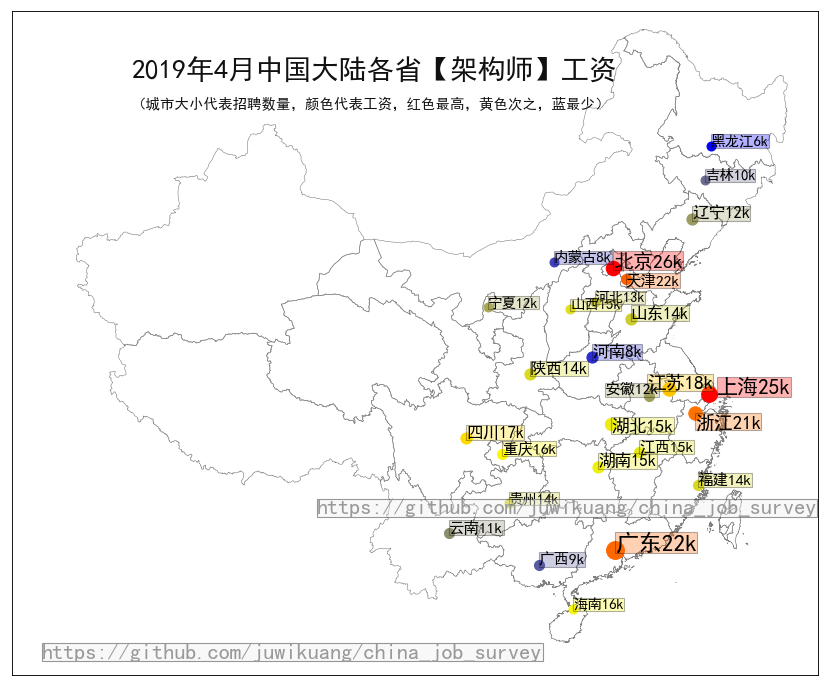

In [23]:
draw_map(data_city_architect,40,'2019年4月中国大陆各省【架构师】工资')

# 生物信息工程师

In [24]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年4月全国招收生物信息工程师72人。2019年4月全国生物信息工程师平均工资9410元，工资中位数8000元，其中95%的人的工资介于4500元到16500元。



In [44]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
浙江,11500,11500,11500,11500,2,2.78%
吉林,11500,11500,11500,11500,2,2.78%
上海,11292,7000,12500,17500,12,16.67%
广东,9355,4500,8550,15000,38,52.78%
江苏,9000,9000,9000,9000,3,4.17%
湖北,8000,8000,8000,8000,6,8.33%
安徽,7500,7500,7500,7500,5,6.94%
江西,7000,7000,7000,7000,1,1.39%
广西,7000,7000,7000,7000,3,4.17%


In [26]:
describe(data_bio,'生物信息工程师')

2019年4月浙江招收生物信息工程师2人。2019年4月浙江生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年4月吉林招收生物信息工程师2人。2019年4月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年4月上海招收生物信息工程师12人。2019年4月上海生物信息工程师平均工资11292元，工资中位数12500元，其中95%的人的工资介于7000元到17500元。

2019年4月广东招收生物信息工程师38人。2019年4月广东生物信息工程师平均工资9355元，工资中位数8550元，其中95%的人的工资介于4500元到15000元。

2019年4月江苏招收生物信息工程师3人。2019年4月江苏生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年4月湖北招收生物信息工程师6人。2019年4月湖北生物信息工程师平均工资8000元，工资中位数8000元，其中95%的人的工资介于8000元到8000元。

2019年4月安徽招收生物信息工程师5人。2019年4月安徽生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。

2019年4月江西招收生物信息工程师1人。2019年4月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年4月广西招收生物信息工程师3人。2019年4月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



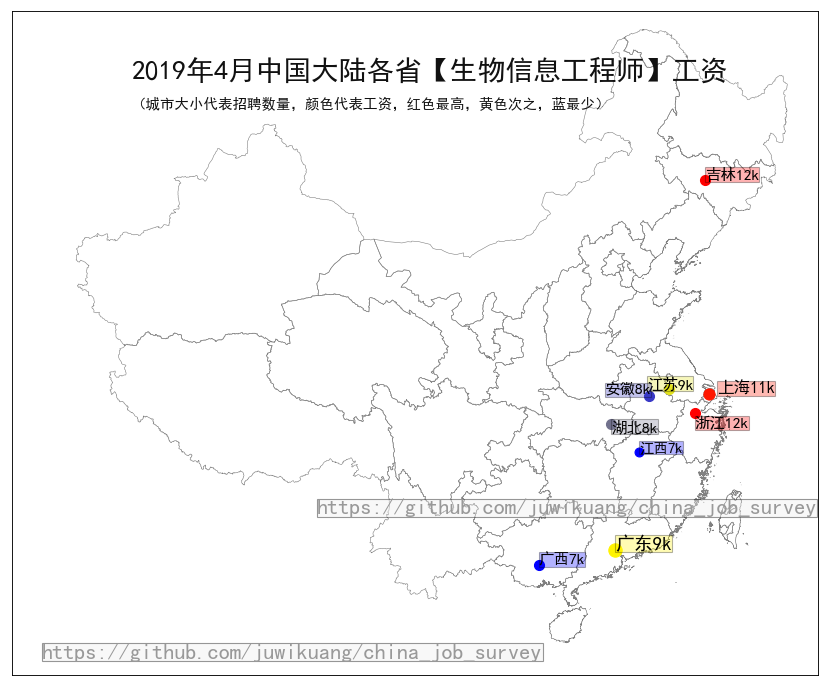

In [27]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [28]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年4月全国招收爬虫工程师489人。2019年4月全国爬虫工程师平均工资14362元，工资中位数12500元，其中95%的人的工资介于3750元到35000元。



In [45]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,21398,2310,17500,39167,68,13.91%
上海,15473,3809,15000,32250,73,14.93%
广东,14583,5250,12500,31146,161,32.92%
江苏,14279,9000,12500,22500,43,8.79%
浙江,13788,8150,12500,24750,26,5.32%
湖北,10365,5250,10667,12500,13,2.66%
四川,9829,2500,8333,22500,38,7.77%
湖南,9550,5312,9000,14688,25,5.11%
河南,5875,5000,5250,9000,16,3.27%


In [30]:
describe(data_spider, '爬虫工程师')

2019年4月北京招收爬虫工程师68人。2019年4月北京爬虫工程师平均工资21398元，工资中位数17500元，其中95%的人的工资介于2310元到39167元。

2019年4月上海招收爬虫工程师73人。2019年4月上海爬虫工程师平均工资15473元，工资中位数15000元，其中95%的人的工资介于3809元到32250元。

2019年4月广东招收爬虫工程师161人。2019年4月广东爬虫工程师平均工资14583元，工资中位数12500元，其中95%的人的工资介于5250元到31146元。

2019年4月江苏招收爬虫工程师43人。2019年4月江苏爬虫工程师平均工资14279元，工资中位数12500元，其中95%的人的工资介于9000元到22500元。

2019年4月浙江招收爬虫工程师26人。2019年4月浙江爬虫工程师平均工资13788元，工资中位数12500元，其中95%的人的工资介于8150元到24750元。

2019年4月湖北招收爬虫工程师13人。2019年4月湖北爬虫工程师平均工资10365元，工资中位数10667元，其中95%的人的工资介于5250元到12500元。

2019年4月四川招收爬虫工程师38人。2019年4月四川爬虫工程师平均工资9829元，工资中位数8333元，其中95%的人的工资介于2500元到22500元。

2019年4月湖南招收爬虫工程师25人。2019年4月湖南爬虫工程师平均工资9550元，工资中位数9000元，其中95%的人的工资介于5312元到14688元。

2019年4月河南招收爬虫工程师16人。2019年4月河南爬虫工程师平均工资5875元，工资中位数5250元，其中95%的人的工资介于5000元到9000元。



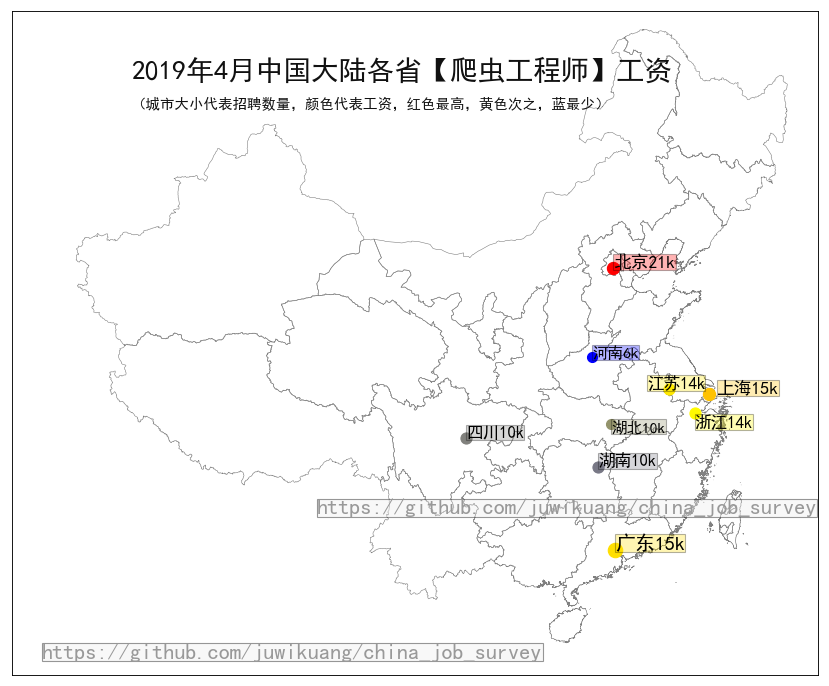

In [31]:
draw_map(data_spider,5,'2019年4月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [32]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年4月全国招收Java程序员137540人。2019年4月全国Java程序员平均工资12854元，工资中位数12000元，其中95%的人的工资介于3750元到30000元。



In [46]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,16578,3000,13333,40000,11426,8.31%
上海,16350,5250,15000,35000,20034,14.57%
广东,14252,3750,12500,32500,33426,24.30%
浙江,13625,3500,12500,30000,8786,6.39%
四川,11635,3000,11000,25000,5083,3.70%
湖北,11605,4250,10499,26000,6658,4.84%
江苏,11214,3750,10500,22500,15438,11.22%
陕西,10738,3909,10000,23500,3642,2.65%
山东,10685,3507,8000,37500,4169,3.03%
天津,10435,4500,9500,22500,1080,0.79%


In [34]:
describe(data_java, 'Java程序员')

2019年4月北京招收Java程序员11426人。2019年4月北京Java程序员平均工资16578元，工资中位数13333元，其中95%的人的工资介于3000元到40000元。

2019年4月上海招收Java程序员20034人。2019年4月上海Java程序员平均工资16350元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2019年4月广东招收Java程序员33426人。2019年4月广东Java程序员平均工资14252元，工资中位数12500元，其中95%的人的工资介于3750元到32500元。

2019年4月浙江招收Java程序员8786人。2019年4月浙江Java程序员平均工资13625元，工资中位数12500元，其中95%的人的工资介于3500元到30000元。

2019年4月四川招收Java程序员5083人。2019年4月四川Java程序员平均工资11635元，工资中位数11000元，其中95%的人的工资介于3000元到25000元。

2019年4月湖北招收Java程序员6658人。2019年4月湖北Java程序员平均工资11605元，工资中位数10499元，其中95%的人的工资介于4250元到26000元。

2019年4月江苏招收Java程序员15438人。2019年4月江苏Java程序员平均工资11214元，工资中位数10500元，其中95%的人的工资介于3750元到22500元。

2019年4月陕西招收Java程序员3642人。2019年4月陕西Java程序员平均工资10738元，工资中位数10000元，其中95%的人的工资介于3909元到23500元。

2019年4月山东招收Java程序员4169人。2019年4月山东Java程序员平均工资10685元，工资中位数8000元，其中95%的人的工资介于3507元到37500元。

2019年4月天津招收Java程序员1080人。2019年4月天津Java程序员平均工资10435元，工资中位数9500元，其中95%的人的工资介于4500元到22500元。

2019年4月重庆招收Java程序员2071人。2019年4月重庆Java程序员平均工资10144元，工资中位数9500元，其中95%的人的工资介于4250元到20000元。

2019年4月湖南

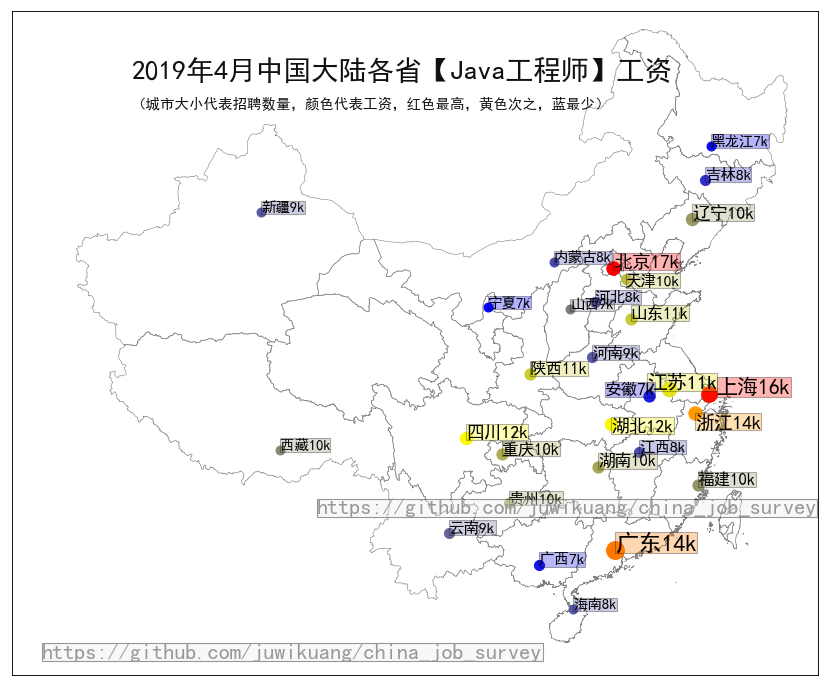

In [35]:
draw_map(data_java, 500, '2019年4月中国大陆各省【Java工程师】工资')

# Python程序员

In [36]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年4月全国招收Python程序员29232人。2019年4月全国Python程序员平均工资17324元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。



In [47]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22631,4500,20000,50000,3993,13.66%
上海,20782,5500,20000,45000,5473,18.72%
海南,18083,7500,15000,35000,42,0.14%
广东,18039,3750,15430,40000,7160,24.49%
浙江,16264,2500,15000,35375,1831,6.26%
江苏,15071,3086,14000,30000,3180,10.88%
四川,14986,3750,13500,33152,1309,4.48%
湖北,13989,5065,12500,33333,1351,4.62%
辽宁,13925,3750,12500,32500,555,1.90%
陕西,12737,3169,12500,27864,769,2.63%


In [38]:
describe(data_python, 'Python程序员')

2019年4月北京招收Python程序员3993人。2019年4月北京Python程序员平均工资22631元，工资中位数20000元，其中95%的人的工资介于4500元到50000元。

2019年4月上海招收Python程序员5473人。2019年4月上海Python程序员平均工资20782元，工资中位数20000元，其中95%的人的工资介于5500元到45000元。

2019年4月海南招收Python程序员42人。2019年4月海南Python程序员平均工资18083元，工资中位数15000元，其中95%的人的工资介于7500元到35000元。

2019年4月广东招收Python程序员7160人。2019年4月广东Python程序员平均工资18039元，工资中位数15430元，其中95%的人的工资介于3750元到40000元。

2019年4月浙江招收Python程序员1831人。2019年4月浙江Python程序员平均工资16264元，工资中位数15000元，其中95%的人的工资介于2500元到35375元。

2019年4月江苏招收Python程序员3180人。2019年4月江苏Python程序员平均工资15071元，工资中位数14000元，其中95%的人的工资介于3086元到30000元。

2019年4月四川招收Python程序员1309人。2019年4月四川Python程序员平均工资14986元，工资中位数13500元，其中95%的人的工资介于3750元到33152元。

2019年4月湖北招收Python程序员1351人。2019年4月湖北Python程序员平均工资13989元，工资中位数12500元，其中95%的人的工资介于5065元到33333元。

2019年4月辽宁招收Python程序员555人。2019年4月辽宁Python程序员平均工资13925元，工资中位数12500元，其中95%的人的工资介于3750元到32500元。

2019年4月陕西招收Python程序员769人。2019年4月陕西Python程序员平均工资12737元，工资中位数12500元，其中95%的人的工资介于3169元到27864元。

2019年4月天津招收Python程序员167人。2019年4月天津Python程序员平均工资12246元，工资中位数10125

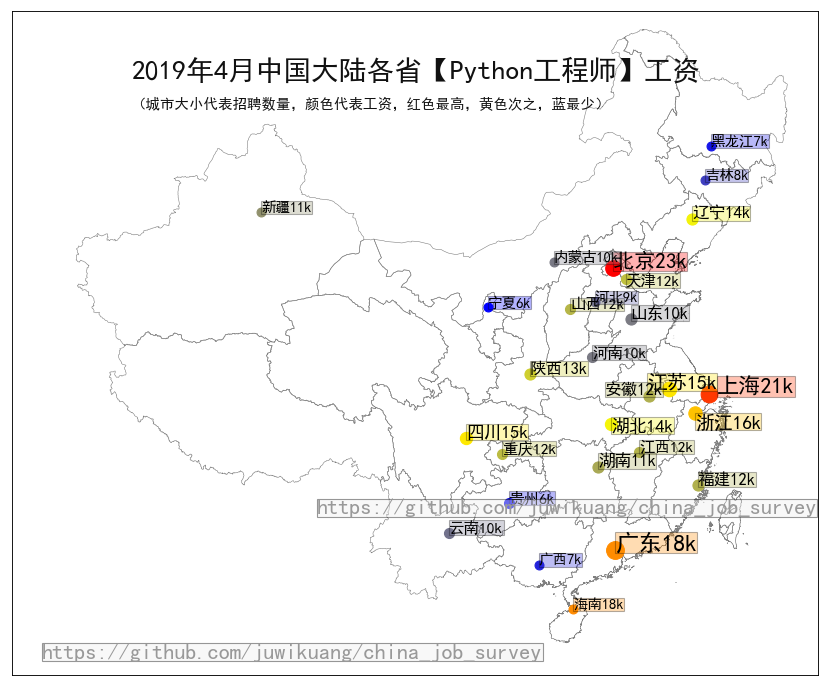

In [39]:
draw_map(data_python, 100,  '2019年4月中国大陆各省【Python工程师】工资')